#### Explanation of the data set:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

### Import libraries for data analysis and exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data set

In [2]:
wine_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv',sep=';')

In [3]:
# column = wine_data.columns[0].split(";")
# for i in range(len(column)):
#     column[i] = column[i].strip('"')

In [4]:
# observations =[]
# for i in range(len(wine_data)):
#     obs = wine_data.iloc[i][0]
#     obs = obs.split(";")
#     for i in range(len(obs)):
#         obs[i] = float(obs[i])
#     observations.append(obs)
# df = pd.DataFrame(observations,columns=column)

In [5]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


* There are 4898 observation with 12 columns
* <b>quality</b> is the target column as per data description
* All the columns are of numerical data type
* There are no missing values

In [7]:
# description measure of the data
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
# check the correlation matrix
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


### Data Visualization
* Visualize all the variables one by one

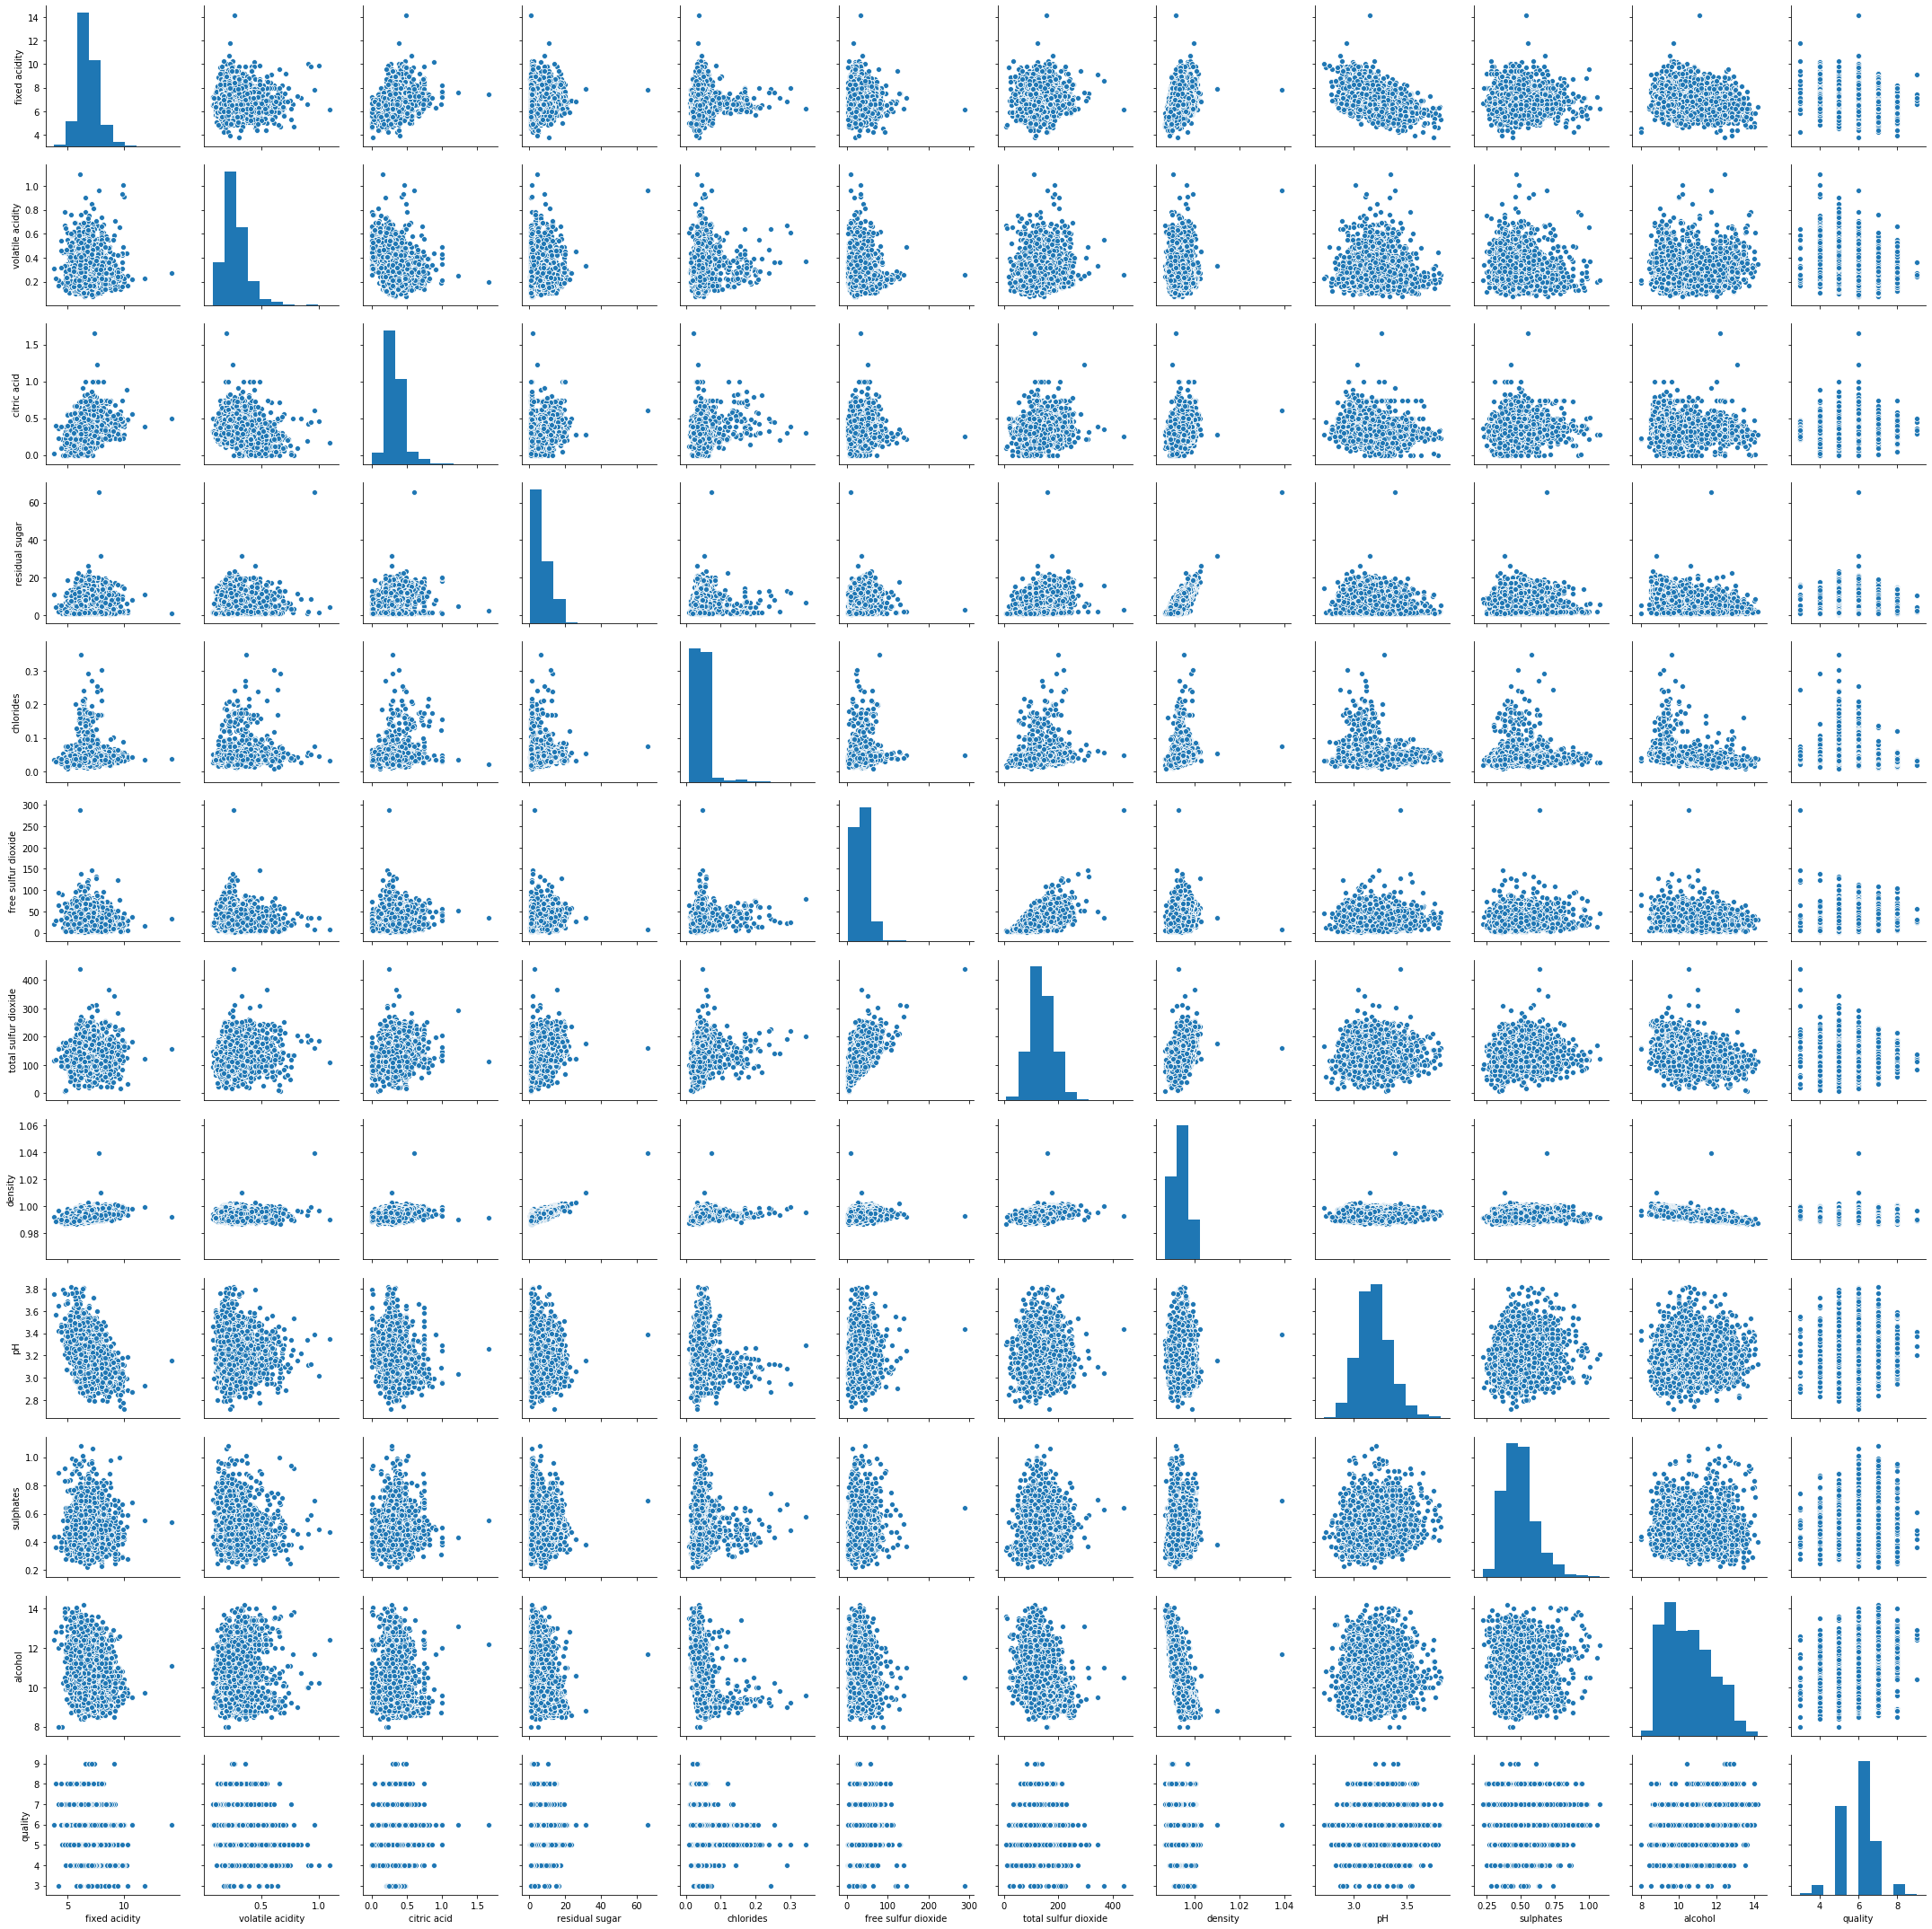

In [9]:
sns.pairplot(wine_data)

* There are outliers in the dataset

In [10]:
wine_data.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

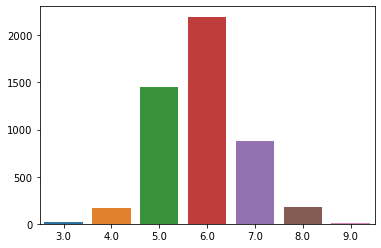

In [11]:
sns.barplot(x=[6.0, 5.0, 7.0, 8.0, 4.0, 3.0, 9.0], y=wine_data.quality.value_counts().values)

* Mainly there are average quality wines
* Very few are poor quality and excellent quality

### Separate target data and feature data

In [12]:
target = wine_data.quality
feature_data = wine_data.drop(columns=['quality'])

### Feature Selection

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(k=8,score_func=f_classif)

In [14]:
feature_data_transformed = fs.fit_transform(feature_data, target)

### Split the data

In [15]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY = train_test_split(feature_data_transformed, target, test_size=0.33, random_state=42)

### Build the model

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
lr.fit(trainX,trainY)

LinearRegression()

In [18]:
print(lr.score(trainX,trainY))
print(lr.score(testX,testY))

0.2732376115791879
0.2620851869928599


### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(trainX,trainY)
print(dt.score(trainX,trainY))
print(dt.score(testX,testY))

1.0
0.5813234384662956


### KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(1,8):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trainX,trainY)
    print('Train score for k = ',k, 'is ',knn.score(trainX,trainY))
    print('Test score for k = ',k, 'is ',knn.score(testX,testY))
    print('-')

Train score for k =  1 is  1.0
Test score for k =  1 is  0.5541125541125541
-
Train score for k =  2 is  0.782688204815605
Test score for k =  2 is  0.4965986394557823
-
Train score for k =  3 is  0.7165498323681805
Test score for k =  3 is  0.47247990105132964
-
Train score for k =  4 is  0.6568119475769583
Test score for k =  4 is  0.46691403834260975
-
Train score for k =  5 is  0.641267906126181
Test score for k =  5 is  0.47186147186147187
-
Train score for k =  6 is  0.6086558975921975
Test score for k =  6 is  0.45083487940630795
-
Train score for k =  7 is  0.595550137153307
Test score for k =  7 is  0.45269016697588127
-
